In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [36]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [37]:
# load data
population = pd.read_csv("country_population.csv")
fertility_rate = pd.read_csv("fertility_rate.csv")
life_expectancy = pd.read_csv("life_expectancy.csv")
country = pd.read_csv("Metadata_Country.csv")

# 1. Data Preprocessing

## 1.1. Population data preprocessing

In [38]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            260 non-null    float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo

Null values count

In [39]:
pd.DataFrame(population.isna().sum()).T

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,0,0,0,4,4,4,4,4,4,...,1,1,1,1,1,2,2,2,2,2


In [40]:
#Country is not specified
population = population.drop(108).reset_index(drop=True)

Median Imputation from 4th Column to 60th Column(i.e. 1960 to 2016)

In [41]:
#4th column se 60st column tak missing values hai
for i in range(4, 61):
    population.iloc[:, i] = np.where(population.iloc[:, i].isna(), population.iloc[:, i].median(), population.iloc[:, i])

## 1.2. Fertility Rate data preprocessing

In [42]:
#country name is 'not specified'
fertility_rate = fertility_rate.drop(108).reset_index(drop=True)

In [43]:
fertility_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    263 non-null    object 
 1   Country Code    263 non-null    object 
 2   Indicator Name  263 non-null    object 
 3   Indicator Code  263 non-null    object 
 4   1960            236 non-null    float64
 5   1961            237 non-null    float64
 6   1962            236 non-null    float64
 7   1963            235 non-null    float64
 8   1964            236 non-null    float64
 9   1965            236 non-null    float64
 10  1966            236 non-null    float64
 11  1967            236 non-null    float64
 12  1968            236 non-null    float64
 13  1969            236 non-null    float64
 14  1970            237 non-null    float64
 15  1971            238 non-null    float64
 16  1972            239 non-null    float64
 17  1973            237 non-null    flo

Null values count

In [44]:
pd.DataFrame(fertility_rate.isna().sum()).T

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,0,0,0,27,26,27,28,27,27,...,14,15,15,16,15,15,17,17,16,17


Median Imputation from 4th Column to 60th Column(i.e. 1960 to 2016)

In [45]:
years = [str(y) for y in range(1960, 2017)]
for year in years:
    fertility_rate[year] = np.where(fertility_rate[year].isna(), fertility_rate[year].median(), fertility_rate[year])

## 1.3. Life Expectancy data preprocessing

In [46]:
life_expectancy = life_expectancy.dropna(how='all', subset=years, ignore_index=True)

In [47]:
for year in years:
    life_expectancy[year] = np.where(life_expectancy[year].isna(), life_expectancy[year].median(), life_expectancy[year])

In [48]:
pd.DataFrame(life_expectancy.isna().sum()).T

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.4. Metadata Country data preprocessing

In [49]:
country.drop(country.columns[5], axis=1, inplace=True)

In [50]:
country = country.dropna(subset=['Region', 'IncomeGroup'], ignore_index=True)

In [51]:
country

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra
...,...,...,...,...,...
212,XKX,Europe & Central Asia,Lower middle income,WB-3 code changed from KSV to XKX to align wit...,Kosovo
213,YEM,Middle East & North Africa,Lower middle income,Based on official government statistics and In...,"Yemen, Rep."
214,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
215,ZMB,Sub-Saharan Africa,Lower middle income,The base year is 2010. National accounts data ...,Zambia


# 2. Data Visualization

In [52]:
population

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0
259,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,21751605.0,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0
260,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,49887181.0,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,12725974.0,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0


In [53]:
country

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra
...,...,...,...,...,...
212,XKX,Europe & Central Asia,Lower middle income,WB-3 code changed from KSV to XKX to align wit...,Kosovo
213,YEM,Middle East & North Africa,Lower middle income,Based on official government statistics and In...,"Yemen, Rep."
214,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
215,ZMB,Sub-Saharan Africa,Lower middle income,The base year is 2010. National accounts data ...,Zambia


Data Binding

In [54]:
population_w_metadata = pd.merge(country, population, how='inner', on='Country Code')
population_w_metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Country Name,Indicator Name,Indicator Code,1960,1961,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,Aruba,"Population, total",SP.POP.TOTL,54211.0,55438.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,Afghanistan,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,Angola,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,Albania,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,Andorra,"Population, total",SP.POP.TOTL,13411.0,14375.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,XKX,Europe & Central Asia,Lower middle income,WB-3 code changed from KSV to XKX to align wit...,Kosovo,Kosovo,"Population, total",SP.POP.TOTL,947000.0,966000.0,...,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0
213,YEM,Middle East & North Africa,Lower middle income,Based on official government statistics and In...,"Yemen, Rep.","Yemen, Rep.","Population, total",SP.POP.TOTL,5172135.0,5260501.0,...,21751605.0,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0
214,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,South Africa,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,...,49887181.0,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0
215,ZMB,Sub-Saharan Africa,Lower middle income,The base year is 2010. National accounts data ...,Zambia,Zambia,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,...,12725974.0,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0


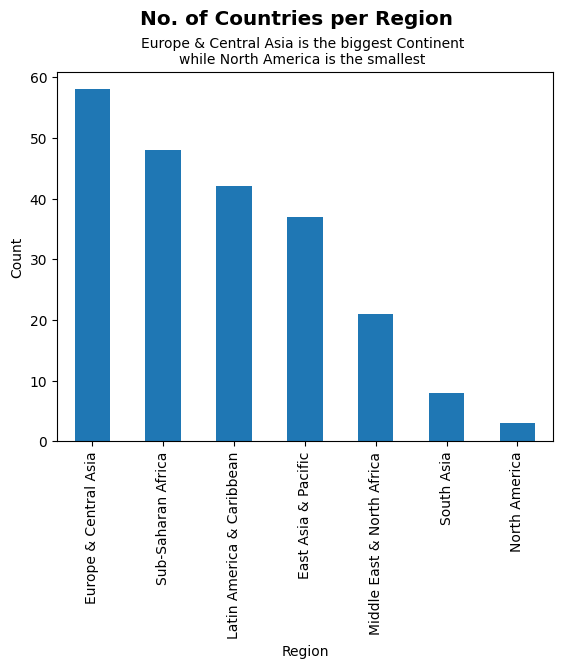

In [55]:
population_w_metadata.Region.value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Europe & Central Asia is the biggest Continent\nwhile North America is the smallest', fontsize='medium', x=0.495)
plt.suptitle('No. of Countries per Region', size='x-large', y=1.01, fontweight='heavy');

In [56]:
regions_list = ['Europe & Central Asia', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'East Asia & Pacific',
       'Middle East & North Africa', 'South Asia']

In [57]:
population_w_region = population_w_metadata.groupby('Region')[years].sum().T
population_w_region.index.name ='Year'
population_w_region.columns.name = ''
population_w_region.reset_index(inplace=True)

### Population Sum Region wise from year 1960 to 2016

In [58]:
population_w_region

,Year,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,1960,1.029333e+09,664307908.5,224104186.5,109158202.5,198624409.0,5.718357e+08,2.285860e+08
1,1961,1.032525e+09,672052178.5,230298675.5,112108433.5,202007500.0,5.838941e+08,2.340086e+08
2,1962,1.046593e+09,680082253.0,236736907.0,115225524.0,205198600.0,5.964139e+08,2.396471e+08
3,1963,1.071955e+09,688185843.0,243356436.0,118426583.0,208253700.0,6.093918e+08,2.455033e+08
4,1964,1.096951e+09,696215075.0,250090779.0,121746028.0,211262900.0,6.228226e+08,2.515764e+08
5,1965,1.123001e+09,703985868.5,256881171.5,125144439.5,214031100.0,6.367018e+08,2.578686e+08
6,1966,1.152479e+09,710735674.0,263704231.0,128610017.0,216659000.0,6.510364e+08,2.643862e+08
7,1967,1.181000e+09,717300291.5,270596382.5,132247768.5,219176000.0,6.658267e+08,2.711393e+08
8,1968,1.209920e+09,723614220.0,277576361.0,135933549.0,221503000.0,6.810549e+08,2.781390e+08
9,1969,1.242337e+09,729821877.5,284674809.5,139728944.5,223759000.0,6.966972e+08,2.853980e+08


In [59]:
population_w_region_long = pd.melt(population_w_region, id_vars=['Year'], value_vars=regions_list,  var_name='Region', value_name="Population")
population_w_region_long['Population(in Billions)'] = population_w_region_long.Population/1000000000
population_w_region_long

,Year,Region,Population,Population(in Billions)
0,1960,Europe & Central Asia,6.643079e+08,0.664308
1,1961,Europe & Central Asia,6.720522e+08,0.672052
2,1962,Europe & Central Asia,6.800823e+08,0.680082
3,1963,Europe & Central Asia,6.881858e+08,0.688186
4,1964,Europe & Central Asia,6.962151e+08,0.696215
...,...,...,...,...
337,2012,South Asia,1.676615e+09,1.676615
338,2013,South Asia,1.699310e+09,1.699310
339,2014,South Asia,1.721848e+09,1.721848
340,2015,South Asia,1.744200e+09,1.744200


## 2.1. Population Trends Over The Years(i.e. 1960 to 2016) by Region

In [60]:
px.bar(population_w_region_long, x='Region', y='Population(in Billions)', color='Region', animation_frame='Year', width=1200, height=600, range_y=[0,2.4],
       title='Net Population Year-by-Year by Region (where East Asia & Paciic shows maximum & fastest growth crosses over 2.4 Billions in 2016)')

In [61]:
px.line(population_w_region_long, x='Year', y='Population(in Billions)', color='Region', height=600, title='Change in Population Over Years(1960 to 2016) by Region')

In [62]:
fertility_w_metadata = pd.merge(country, fertility_rate, how='inner', on='Country Code')
fertility_w_metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Country Name,Indicator Name,Indicator Code,1960,1961,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,Aruba,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.8200,4.655,...,1.763,1.764,1.769,1.776,1.7830,1.7910,1.7960,1.800,1.801,1.8000
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,Afghanistan,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.4500,7.450,...,6.460,6.254,6.038,5.816,5.5950,5.3800,5.1740,4.981,4.802,4.6350
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,Angola,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.4780,7.524,...,6.368,6.307,6.238,6.162,6.0820,6.0000,5.9200,5.841,5.766,5.6940
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,Albania,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.4890,6.401,...,1.668,1.650,1.646,1.653,1.6680,1.6850,1.7000,1.710,1.714,1.7130
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,Andorra,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.1045,6.073,...,1.180,1.250,1.190,1.270,2.3715,2.3435,2.3425,2.331,2.308,2.2835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,XKX,Europe & Central Asia,Lower middle income,WB-3 code changed from KSV to XKX to align wit...,Kosovo,Kosovo,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.1045,6.073,...,2.430,2.380,2.340,2.290,2.2400,2.1900,2.1600,2.130,2.090,2.0600
213,YEM,Middle East & North Africa,Lower middle income,Based on official government statistics and In...,"Yemen, Rep.","Yemen, Rep.","Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.4880,7.531,...,5.090,4.940,4.801,4.674,4.5540,4.4400,4.3270,4.215,4.104,3.9950
214,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,South Africa,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.0410,6.028,...,2.636,2.619,2.603,2.588,2.5720,2.5540,2.5330,2.510,2.485,2.4580
215,ZMB,Sub-Saharan Africa,Lower middle income,The base year is 2010. National accounts data ...,Zambia,Zambia,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.1150,7.169,...,5.642,5.561,5.478,5.397,5.3180,5.2420,5.1710,5.104,5.041,4.9810


### Average fertility rate by region

In [63]:
avg_fertility = fertility_w_metadata.groupby('Region')[years].mean().round(2).T
avg_fertility.index.name ='Year'
avg_fertility.columns.name = None
avg_fertility.reset_index(inplace=True)
avg_fertility

,Year,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,1960,6.00,3.81,5.98,6.65,4.52,6.48,6.58
1,1961,5.97,3.73,5.96,6.66,4.48,6.48,6.60
2,1962,5.94,3.77,5.93,6.68,4.41,6.47,6.62
3,1963,5.90,3.84,5.89,6.69,4.35,6.47,6.64
4,1964,5.82,3.74,5.82,6.70,4.23,6.46,6.65
5,1965,5.73,3.68,5.74,6.69,4.00,6.44,6.66
6,1966,5.64,3.63,5.65,6.68,3.81,6.43,6.67
7,1967,5.56,3.60,5.57,6.66,3.68,6.41,6.68
8,1968,5.47,3.54,5.47,6.64,3.58,6.39,6.69
9,1969,5.37,3.47,5.36,6.59,3.53,6.37,6.70


In [64]:
avg_fertility_long = pd.melt(avg_fertility, id_vars=['Year'], value_vars=regions_list,  var_name='Region', value_name="Avg Fertility")
avg_fertility_long

,Year,Region,Avg Fertility
0,1960,Europe & Central Asia,3.81
1,1961,Europe & Central Asia,3.73
2,1962,Europe & Central Asia,3.77
3,1963,Europe & Central Asia,3.84
4,1964,Europe & Central Asia,3.74
...,...,...,...
337,2012,South Asia,2.85
338,2013,South Asia,2.78
339,2014,South Asia,2.72
340,2015,South Asia,2.66


## 2.2 Average Fertility Rate Distribution among all Regions

In [65]:
px.histogram(avg_fertility_long, x='Avg Fertility', width=700, title='Average Fertility Rate Distribution(Max women have fertility rate between 2.5 to 3)')

In [66]:
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,74.576000,74.725000,74.872000,75.016000,75.158000,75.299000,75.440000,75.582000,75.725000,75.867000
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292000,32.742000,33.185000,33.624000,34.060000,34.495000,...,59.694000,60.243000,60.754000,61.226000,61.666000,62.086000,62.494000,62.895000,63.288000,63.673000
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251000,33.573000,33.914000,34.272000,34.645000,35.031000,...,55.096000,56.189000,57.231000,58.192000,59.042000,59.770000,60.373000,60.858000,61.241000,61.547000
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279000,63.298000,64.187000,64.911000,65.461000,65.848000,...,75.656000,75.943000,76.281000,76.652000,77.031000,77.389000,77.702000,77.963000,78.174000,78.345000
4,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.825065,47.407699,47.988878,48.572229,49.159167,49.744338,...,69.424552,69.646970,69.851434,70.041054,70.223894,70.408016,70.598298,70.793957,70.994541,71.198456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.265000,53.273000,54.284500,54.932000,55.407000,55.859860,...,69.197561,69.397561,69.648780,69.900000,70.148780,70.497561,70.797561,71.097561,71.346341,71.646341
250,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,34.361000,34.471000,34.739000,35.187000,35.815000,36.597000,...,62.552000,62.888000,63.208000,63.508000,63.786000,64.046000,64.291000,64.523000,64.743000,64.953000
251,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.215000,52.559000,52.894000,53.229000,53.571000,53.926000,...,53.010000,53.720000,54.701000,55.888000,57.201000,58.545000,59.830000,60.993000,61.981000,62.774000
252,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,45.124000,45.502000,45.869000,46.225000,46.574000,46.929000,...,52.313000,53.749000,55.194000,56.588000,57.872000,59.011000,59.982000,60.775000,61.397000,61.874000


In [67]:
life_expectancy_w_metadata = pd.merge(country, life_expectancy, how='inner', on='Country Code')
life_expectancy_w_metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Country Name,Indicator Name,Indicator Code,1960,1961,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,Aruba,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,...,74.576000,74.725000,74.87200,75.016,75.15800,75.299000,75.440000,75.582000,75.725000,75.867000
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,Afghanistan,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,...,59.694000,60.243000,60.75400,61.226,61.66600,62.086000,62.494000,62.895000,63.288000,63.673000
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,Angola,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,...,55.096000,56.189000,57.23100,58.192,59.04200,59.770000,60.373000,60.858000,61.241000,61.547000
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,Albania,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,...,75.656000,75.943000,76.28100,76.652,77.03100,77.389000,77.702000,77.963000,78.174000,78.345000
4,ARE,Middle East & North Africa,High income,NaN,United Arab Emirates,United Arab Emirates,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.265,53.312,...,75.828000,76.012000,76.18300,76.344,76.49800,76.648000,76.798000,76.948000,77.101000,77.256000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,XKX,Europe & Central Asia,Lower middle income,WB-3 code changed from KSV to XKX to align wit...,Kosovo,Kosovo,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.265,53.273,...,69.197561,69.397561,69.64878,69.900,70.14878,70.497561,70.797561,71.097561,71.346341,71.646341
204,YEM,Middle East & North Africa,Lower middle income,Based on official government statistics and In...,"Yemen, Rep.","Yemen, Rep.","Life expectancy at birth, total (years)",SP.DYN.LE00.IN,34.361,34.471,...,62.552000,62.888000,63.20800,63.508,63.78600,64.046000,64.291000,64.523000,64.743000,64.953000
205,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,South Africa,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.215,52.559,...,53.010000,53.720000,54.70100,55.888,57.20100,58.545000,59.830000,60.993000,61.981000,62.774000
206,ZMB,Sub-Saharan Africa,Lower middle income,The base year is 2010. National accounts data ...,Zambia,Zambia,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,45.124,45.502,...,52.313000,53.749000,55.19400,56.588,57.87200,59.011000,59.982000,60.775000,61.397000,61.874000


### Average life expectancy rate by region

In [68]:
avg_life = life_expectancy_w_metadata.groupby('Region')[years].mean().round(2).T
avg_life.index.name ='Year'
avg_life.columns.name = None
avg_life.reset_index(inplace=True)
avg_life

,Year,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,1960,54.50,64.56,56.90,50.17,64.39,41.38,41.15
1,1961,55.00,65.05,57.48,51.78,64.96,41.93,41.57
2,1962,55.50,65.27,58.04,52.47,65.26,42.48,41.99
3,1963,56.02,65.63,58.53,52.32,65.41,43.05,42.39
4,1964,56.52,66.07,58.98,53.00,65.78,43.62,42.80
5,1965,57.01,66.28,59.41,53.68,70.33,44.20,43.20
6,1966,57.53,66.56,59.82,55.11,66.17,44.75,43.60
7,1967,58.06,66.84,60.30,55.74,66.63,45.27,44.02
8,1968,58.54,67.05,60.74,56.37,66.69,45.75,44.44
9,1969,59.02,67.22,61.22,57.02,67.24,46.21,44.88


In [69]:
avg_life_long = pd.melt(avg_life, id_vars=['Year'], value_vars=regions_list,  var_name='Region', value_name="Avg Life Years")
avg_life_long

,Year,Region,Avg Life Years
0,1960,Europe & Central Asia,64.56
1,1961,Europe & Central Asia,65.05
2,1962,Europe & Central Asia,65.27
3,1963,Europe & Central Asia,65.63
4,1964,Europe & Central Asia,66.07
...,...,...,...
337,2012,South Asia,69.32
338,2013,South Asia,69.63
339,2014,South Asia,69.94
340,2015,South Asia,70.24


In [70]:
p75, p25 = np.percentile(avg_life_long['Avg Life Years'], [75 ,25])
IQR = p75 -p25
print(f'Interquartile range for Avg Life Span = Percentile75th - Percentile25th = {p75} - {p25} = {IQR}')

Interquartile range for Avg Life Span = Percentile75th - Percentile25th = 70.64 - 56.07 = 14.57


## 2.3 Average Life Span Variation among all Regions

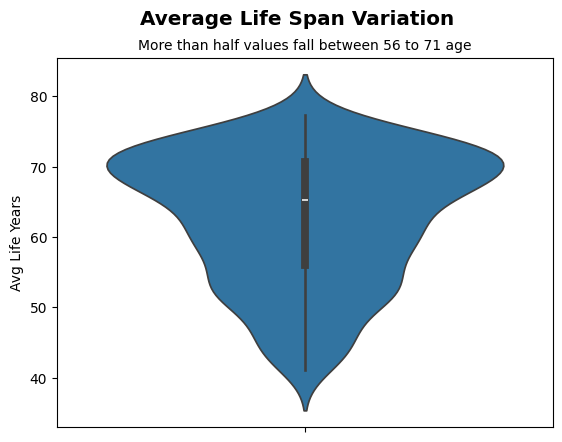

In [71]:
sns.violinplot(avg_life_long['Avg Life Years'], inner='box').set_title('More than half values fall between 56 to 71 age', fontsize='medium');
plt.suptitle('Average Life Span Variation', fontsize='x-large', fontweight='heavy');

In [72]:
px.box(avg_life_long, y='Avg Life Years', x='Region', color='Region', width=1200, height=600, title='Average Life Span Variation Region-Wise')

## 2.4. Population-Fertility-Life Span Relation Over The Years(i.e. 1960 to 2016) Region-wise Analysis

In [73]:
final_df = pd.merge(population_w_region_long, avg_fertility_long, on=['Year', 'Region'])
final_df = pd.merge(final_df, avg_life_long, on=['Year', 'Region'])
final_df

,Year,Region,Population,Population(in Billions),Avg Fertility,Avg Life Years
0,1960,Europe & Central Asia,6.643079e+08,0.664308,3.81,64.56
1,1961,Europe & Central Asia,6.720522e+08,0.672052,3.73,65.05
2,1962,Europe & Central Asia,6.800823e+08,0.680082,3.77,65.27
3,1963,Europe & Central Asia,6.881858e+08,0.688186,3.84,65.63
4,1964,Europe & Central Asia,6.962151e+08,0.696215,3.74,66.07
...,...,...,...,...,...,...
337,2012,South Asia,1.676615e+09,1.676615,2.85,69.32
338,2013,South Asia,1.699310e+09,1.699310,2.78,69.63
339,2014,South Asia,1.721848e+09,1.721848,2.72,69.94
340,2015,South Asia,1.744200e+09,1.744200,2.66,70.24


In [74]:
final_df.describe()

,Population,Population(in Billions),Avg Fertility,Avg Life Years
count,3.420000e+02,342.000000,342.000000,342.000000
mean,8.090485e+08,0.809049,4.322661,62.926287
std,5.493343e+08,0.549334,1.594337,9.276749
min,1.091582e+08,0.109158,1.740000,41.150000
25%,3.641262e+08,0.364126,2.840000,56.070000
50%,7.003415e+08,0.700342,4.200000,65.200000
75%,1.037782e+09,1.037782,5.890000,70.640000
max,2.275219e+09,2.275219,6.710000,77.340000


In [75]:
px.scatter(final_df, x='Avg Fertility', y='Avg Life Years', size='Population(in Billions)', color='Region', opacity=0.7, width=1500, height=600,
           title='Avg Life Span increases as bubble size(population) increases over years, but Fertility decreases')

In [76]:
px.scatter(final_df, x='Avg Fertility', y='Avg Life Years', size='Population(in Billions)', color='Region', opacity=0.7, animation_frame='Year',
           range_x=[1,7], range_y=[40,80], width=1500, height=700, title='ANIMATION PLOT: Avg Life Years Increases as Fertility Decreases year-by-year(1960 to 2016) for all Regions where bubble size represents Population')

## 2.5. Correlation Analysis

Average Fertility & Average Life Span are negatively correlated

In [77]:
corr_matrix = final_df.corr(numeric_only=True)
px.imshow(corr_matrix, zmin=-1, zmax=1, text_auto=True, color_continuous_scale=['red','white','blue'],
          title='Average Fertility & Average Life Span are negatively correlated', width=600, height=600) 

---
# ___END OF PROJECT !!!___